In [1]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.feature_selection import VarianceThreshold

In [2]:
nombres_columnas = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3']
nombres_columnas += [f'sensor_{i}' for i in range(1, 24)]

In [3]:
def createdf(number):
    nombres_columnas = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3']
    nombres_columnas += [f'sensor_{i}' for i in range(1, 24)]
    df = pd.read_csv(rf"./CMAPSSData/train_FD00{number}.txt",sep = " ", header = None, index_col = None)
    df.columns = nombres_columnas
    df = df.iloc[:, :-2]
    return df

In [4]:
df1 = createdf(1)
df2 = createdf(2)
df3 = createdf(3)
df4 = createdf(4)

In [5]:
df1.unit.describe()

count    20631.000000
mean        51.506568
std         29.227633
min          1.000000
25%         26.000000
50%         52.000000
75%         77.000000
max        100.000000
Name: unit, dtype: float64

In [6]:
df2.unit.describe()

count    53759.000000
mean       131.082981
std         74.463862
min          1.000000
25%         68.000000
50%        131.000000
75%        195.000000
max        260.000000
Name: unit, dtype: float64

In [7]:
df3.unit.describe()

count    24720.000000
mean        48.631877
std         29.348985
min          1.000000
25%         23.000000
50%         47.000000
75%         74.000000
max        100.000000
Name: unit, dtype: float64

In [8]:
df4.unit.describe()

count    61249.000000
mean       124.325181
std         71.995350
min          1.000000
25%         60.000000
50%        126.000000
75%        185.000000
max        249.000000
Name: unit, dtype: float64

In [9]:
df1.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1      1       -0.0007       -0.0004         100.0    518.67    641.82   
1     1      2        0.0019       -0.0003         100.0    518.67    642.15   
2     1      3       -0.0043        0.0003         100.0    518.67    642.35   
3     1      4        0.0007        0.0000         100.0    518.67    642.35   
4     1      5       -0.0019       -0.0002         100.0    518.67    642.37   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1   1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2   1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3   1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4   1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     8.4195       0.03        392       2388      100.0      39.06    23.4190  
1     8.4318       0.03        392       2388      100.0      39.00    23.4236  
2     8.4178       0.03        390       2388      100.0      38.95    23.3442  
3     8.3682       0.03        392       2388      100.0      38.88    23.3739  
4     8.4294       0.03        393       2388      100.0      38.90    23.4044  

[5 rows x 26 columns]

In [10]:
df4.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1      1       42.0049        0.8400         100.0    445.00    549.68   
1     1      2       20.0020        0.7002         100.0    491.19    606.07   
2     1      3       42.0038        0.8409         100.0    445.00    548.95   
3     1      4       42.0000        0.8400         100.0    445.00    548.70   
4     1      5       25.0063        0.6207          60.0    462.54    536.10   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1343.43   1112.93      3.91  ...     129.78    2387.99    8074.83   
1   1477.61   1237.50      9.35  ...     312.59    2387.73    8046.13   
2   1343.12   1117.05      3.91  ...     129.62    2387.97    8066.62   
3   1341.24   1118.03      3.91  ...     129.80    2388.02    8076.05   
4   1255.23   1033.59      7.05  ...     164.11    2028.08    7865.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     9.3335       0.02        330       2212     100.00      10.62     6.3670  
1     9.1913       0.02        361       2324     100.00      24.37    14.6552  
2     9.4007       0.02        329       2212     100.00      10.48     6.4213  
3     9.3369       0.02        328       2212     100.00      10.54     6.4176  
4    10.8366       0.02        305       1915      84.93      14.03     8.6754  

[5 rows x 26 columns]

In [11]:
max_cycle_by_unit = df4.groupby('unit')['cycle'].transform('max')
df4['RUL'] = max_cycle_by_unit - df4['cycle']

In [12]:
df4[["unit","cycle","op_setting_1","op_setting_2","op_setting_3"]].describe()

unit         cycle  op_setting_1  op_setting_2  op_setting_3
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000
mean     124.325181    134.311417     23.999823      0.571347     94.031576
std       71.995350     89.783389     14.780722      0.310703     14.251954
min        1.000000      1.000000      0.000000      0.000000     60.000000
25%       60.000000     62.000000     10.004600      0.250700    100.000000
50%      126.000000    123.000000     25.001400      0.700000    100.000000
75%      185.000000    191.000000     41.998100      0.840000    100.000000
max      249.000000    543.000000     42.008000      0.842000    100.000000

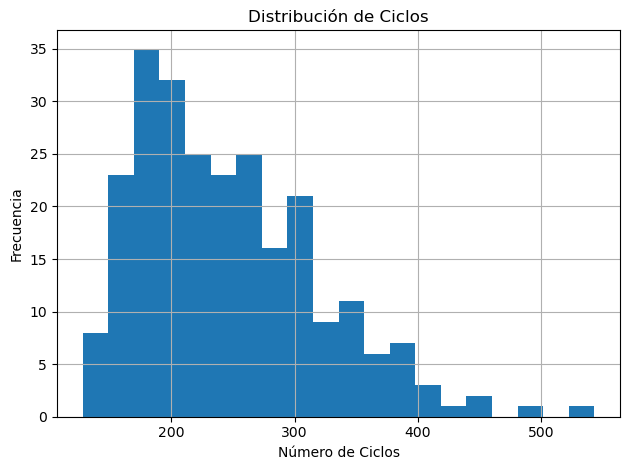

In [13]:

ciclos_por_unidad = df4.groupby('unit').size()
plt.figure()
ciclos_por_unidad.hist(bins=20)
plt.title('Distribución de Ciclos')
plt.xlabel('Número de Ciclos')
plt.ylabel('Frecuencia')
plt.tight_layout()

plt.savefig('IMGS/ciclos_por_unidad.png')
#plt.show()

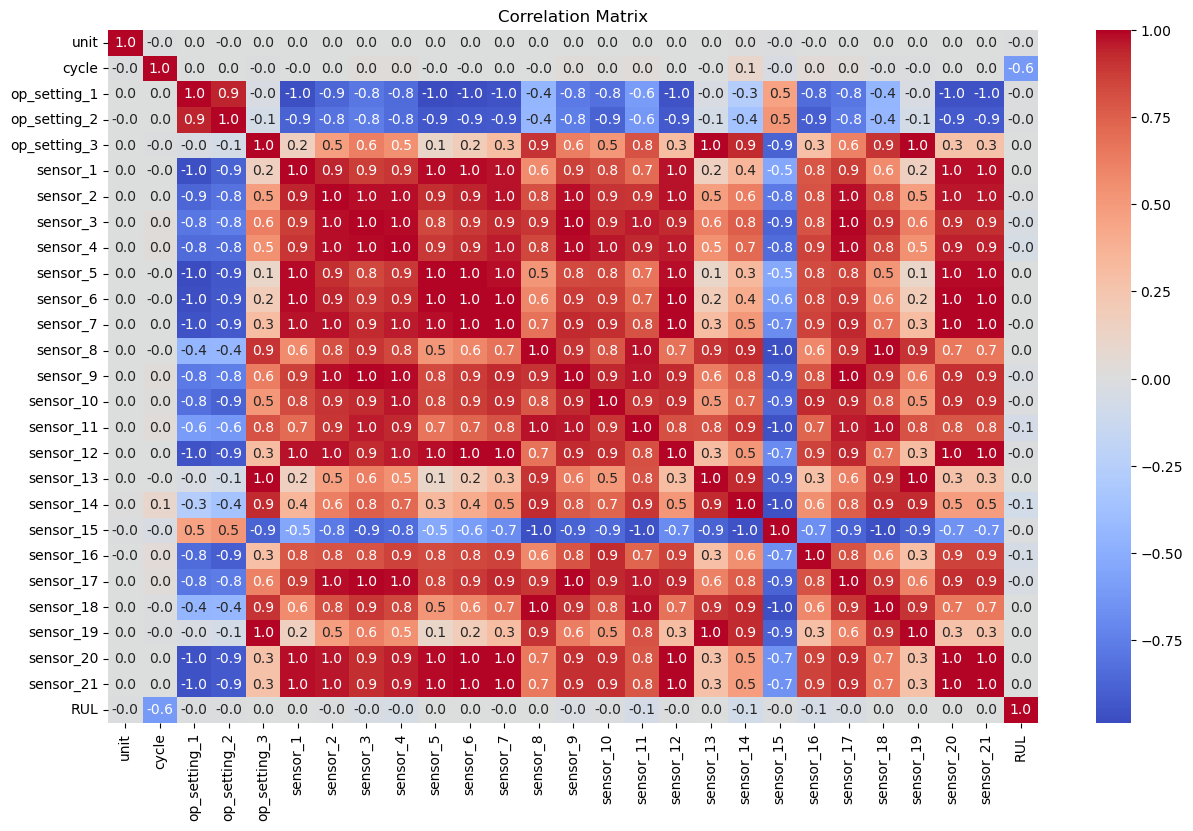

In [14]:
corr_df = df4.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr_df,cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.savefig('IMGS/correlation matrix.png')
plt.show()

In [15]:
def plot_cyles_per_motor(df):

    cycle_counts = df.groupby('unit')['cycle'].count().reset_index()
    
    cycle_counts.columns = ['unit', 'cycle_count']
    media = cycle_counts.cycle_count.mean()
    
    print(cycle_counts)
    print(media)
    
    # Crear un gráfico de barras para mostrar la cantidad de ciclos por motor
    plt.figure(figsize=(12, 6))
    plt.bar(cycle_counts['unit'], cycle_counts['cycle_count'])
    plt.axhline(y = media, color = 'r', label = "media de ciclos")
    plt.xlabel('Motor ID')
    plt.ylabel('Cantidad de Ciclos')
    plt.title('Cantidad de Ciclos por Motor')
    plt.xticks(rotation=45)  # Rotar los nombres de las unidades para mayor legibilidad
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.savefig('IMGS/ciclos por motor.png')
    plt.show()

     unit  cycle_count
0       1          321
1       2          299
2       3          307
3       4          274
4       5          193
..    ...          ...
244   245          205
245   246          161
246   247          211
247   248          184
248   249          255

[249 rows x 2 columns]
245.97991967871485


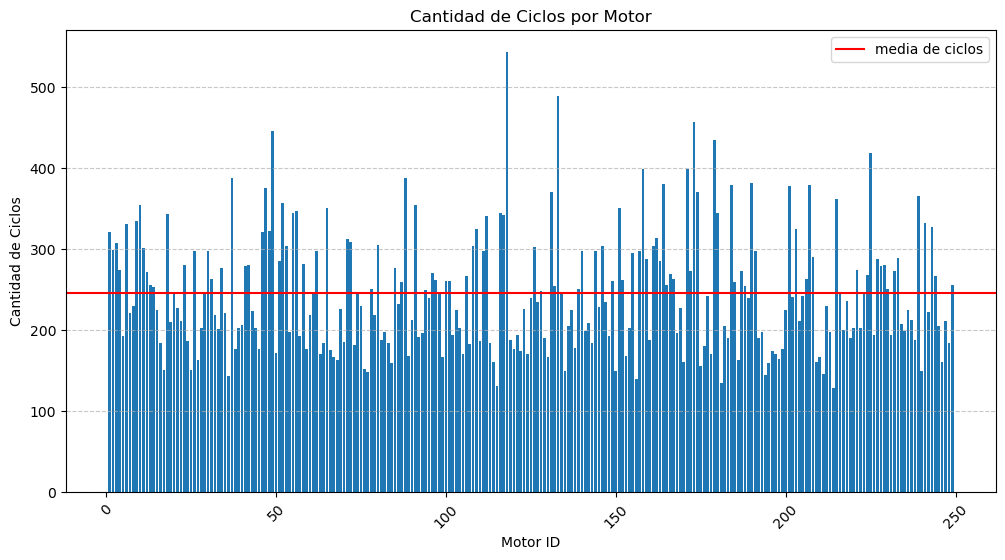

In [16]:
plot_cyles_per_motor(df4)

In [17]:
def correlation_by_engine(engine, df):
    new_df = df[df["unit"] == engine]
    new_df = new_df.drop(columns=['unit'])
    corr_df = new_df.corr()
    plt.figure(figsize=(15, 6))
    sns.heatmap(corr_df,cmap='coolwarm', annot=True, fmt=".1f")
    plt.title('Correlation Matrix')
    plt.show()

In [18]:
varianzas = df4.var(numeric_only=True)
varianzas.sort_values()

sensor_16            0.000022
sensor_10            0.016302
op_setting_2         0.096537
sensor_15            0.563061
sensor_11           10.520237
sensor_5            13.125202
sensor_19           28.830710
sensor_6            29.637316
sensor_21           35.553759
sensor_20           98.731968
op_setting_3       203.118191
op_setting_1       218.469733
sensor_1           698.906067
sensor_17          773.300629
sensor_2          1394.473263
unit              5183.330401
sensor_14         7339.442015
cycle             8061.057015
RUL               8061.057015
sensor_3         11271.558809
sensor_4         14239.073899
sensor_13        16434.691116
sensor_12        19176.463675
sensor_8         21126.111710
sensor_18        21162.245693
sensor_7         21573.795950
sensor_9        113520.171620
dtype: float64

In [19]:
print(type(varianzas))

<class 'pandas.core.series.Series'>


In [20]:

X = df4.select_dtypes(include='number')


selector = VarianceThreshold(threshold=0.05)
selector.fit(X)


columnas_baja_varianza = X.columns[~selector.get_support()]
print("Columnas con varianza baja o nula:", columnas_baja_varianza.tolist())

Columnas con varianza baja o nula: ['sensor_10', 'sensor_16']


In [21]:
df4.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1      1       42.0049        0.8400         100.0    445.00    549.68   
1     1      2       20.0020        0.7002         100.0    491.19    606.07   
2     1      3       42.0038        0.8409         100.0    445.00    548.95   
3     1      4       42.0000        0.8400         100.0    445.00    548.70   
4     1      5       25.0063        0.6207          60.0    462.54    536.10   

   sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  sensor_15  \
0   1343.43   1112.93      3.91  ...    2387.99    8074.83     9.3335   
1   1477.61   1237.50      9.35  ...    2387.73    8046.13     9.1913   
2   1343.12   1117.05      3.91  ...    2387.97    8066.62     9.4007   
3   1341.24   1118.03      3.91  ...    2388.02    8076.05     9.3369   
4   1255.23   1033.59      7.05  ...    2028.08    7865.80    10.8366   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.02        330       2212     100.00      10.62     6.3670  320  
1       0.02        361       2324     100.00      24.37    14.6552  319  
2       0.02        329       2212     100.00      10.48     6.4213  318  
3       0.02        328       2212     100.00      10.54     6.4176  317  
4       0.02        305       1915      84.93      14.03     8.6754  316  

[5 rows x 27 columns]

In [22]:
import random
def plot_sensor_for_random_motors_with_vertical_lines(df, sensor_column, num_motors=3):
    if sensor_column not in df.columns:
        raise ValueError(f"La columna {sensor_column} no existe en el DataFrame.")
    
    unique_units = df['unit'].unique()
    
    random_units = random.sample(unique_units.tolist(), num_motors)
    
    plt.figure(figsize=(12, 6))
    
    cycle_limits = []
    
    for unit in random_units:
        unit_data = df[df['unit'] == unit]
        
        if not unit_data.empty:
            last_cycle = unit_data['cycle'].max()
            cycle_limits.append(last_cycle)
            plt.axvline(x=last_cycle, color='r', linestyle='--', label=f'Final de ciclo: {unit}')
    

    sns.lineplot(data=df[df['unit'].isin(random_units)], x='cycle', y=sensor_column, hue='unit')
    
    plt.xlabel('Ciclo')
    plt.ylabel(f'Valor del Sensor {sensor_column}')
    plt.title(f'Valores del Sensor {sensor_column} por Cíclos para {num_motors} Motores Aleatorios')
    #plt.legend(title='Motor ID')
    
    for limit in cycle_limits:
        plt.axvline(x=limit, color='r', linestyle='--')
    
    plt.show()

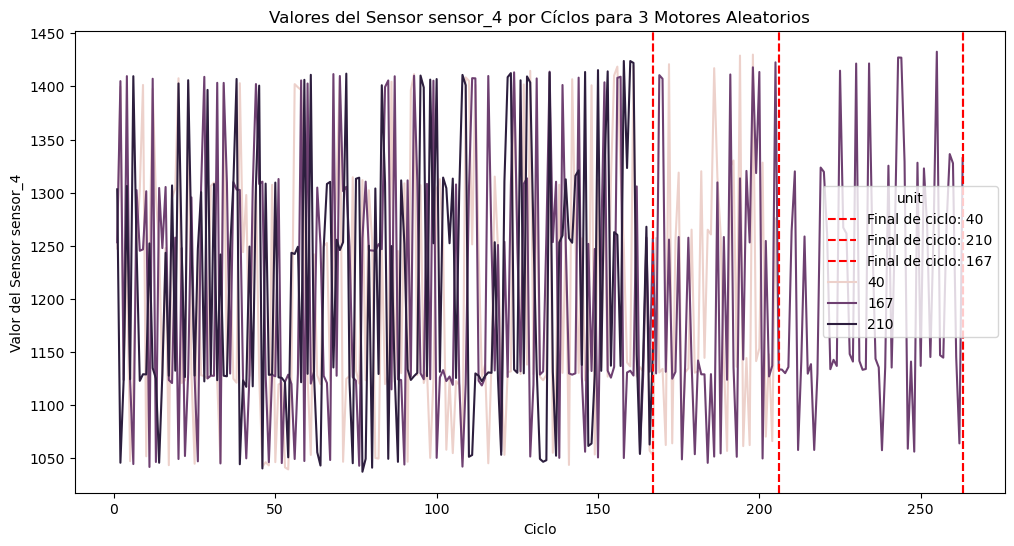

In [23]:
plot_sensor_for_random_motors_with_vertical_lines(df4, "sensor_4", num_motors=3)

In [24]:
def plot_sensor_trends_with_moving_average_random_motors(df, sensor_column, num_motors=3): 
    random.seed(500)
    unique_units = df['unit'].unique()
    
    random_units = random.sample(unique_units.tolist(), num_motors)
    motors_means = []

    plt.figure(figsize=(12, 6))
    
    for unit in random_units:
        unit_data = df[df['unit'] == unit]
        
        if not unit_data.empty:
            window_size = 25
            last_cycle = unit_data['cycle'].max()
            motors_means.append(unit_data[f'{sensor_column}'].mean())
            unit_data[f'ma_{sensor_column}'] = unit_data[sensor_column].rolling(window=window_size, min_periods=1).mean()
            plt.plot(unit_data['cycle'], unit_data[f'ma_{sensor_column}'], label=f'Moving Average (Window: {window_size})', linestyle='-')
            #plt.plot(unit_data['cycle'], unit_data[sensor_column], label=f'Motor {unit}', linestyle='-')
            plt.axvline(x=last_cycle, color='r', linestyle='--')
            plt.axhline(y=unit_data[f'ma_{sensor_column}'].iloc[-1], color='b', linestyle='-')
            
            
            if unit == random_units[-1]:
                plt.legend(title='Motor')

                
    plt.axhline(y= np.average(motors_means), color='g', linestyle='-')
    
    plt.xlabel('Ciclo')
    plt.ylabel(f'media movil del Sensor {sensor_column}')
    plt.title(f'Tendencias con Media Móvil para Motores Aleatorios {random_units} - Sensor: {sensor_column}')
    plt.savefig(f'IMGS/tendencias de motores aleatorios hasta fallo sensor {sensor_column}.png')
    plt.tight_layout()
    plt.show()

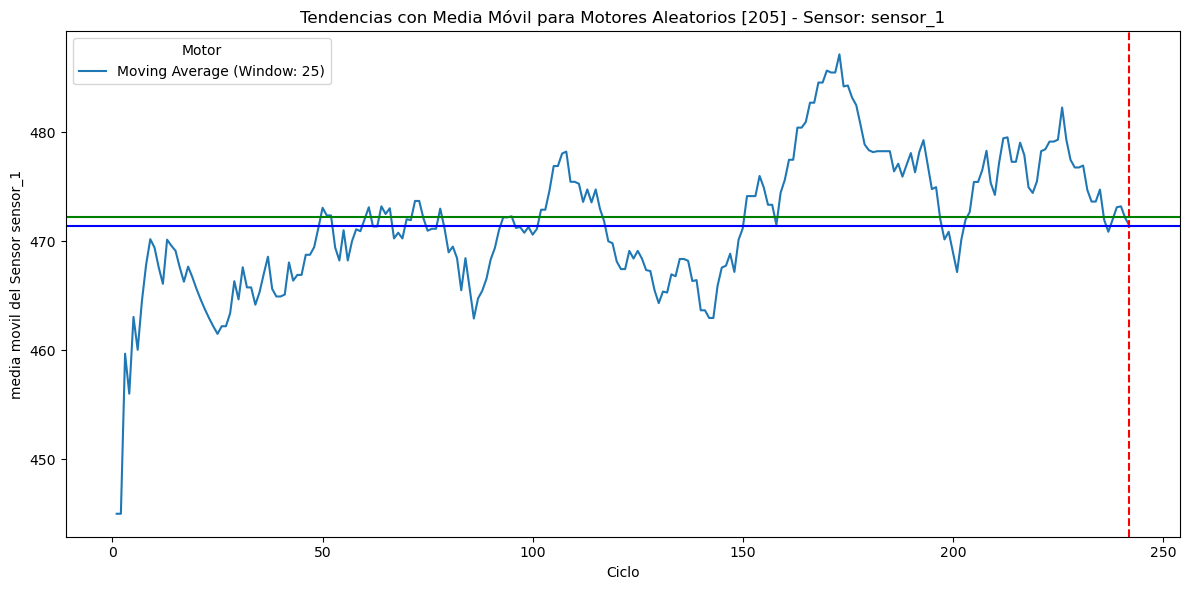

In [25]:
import warnings
warnings.filterwarnings("ignore")
plot_sensor_trends_with_moving_average_random_motors(df4, "sensor_1",num_motors= 1)

In [26]:
df4.columns

Index(['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'RUL'],
      dtype='object')

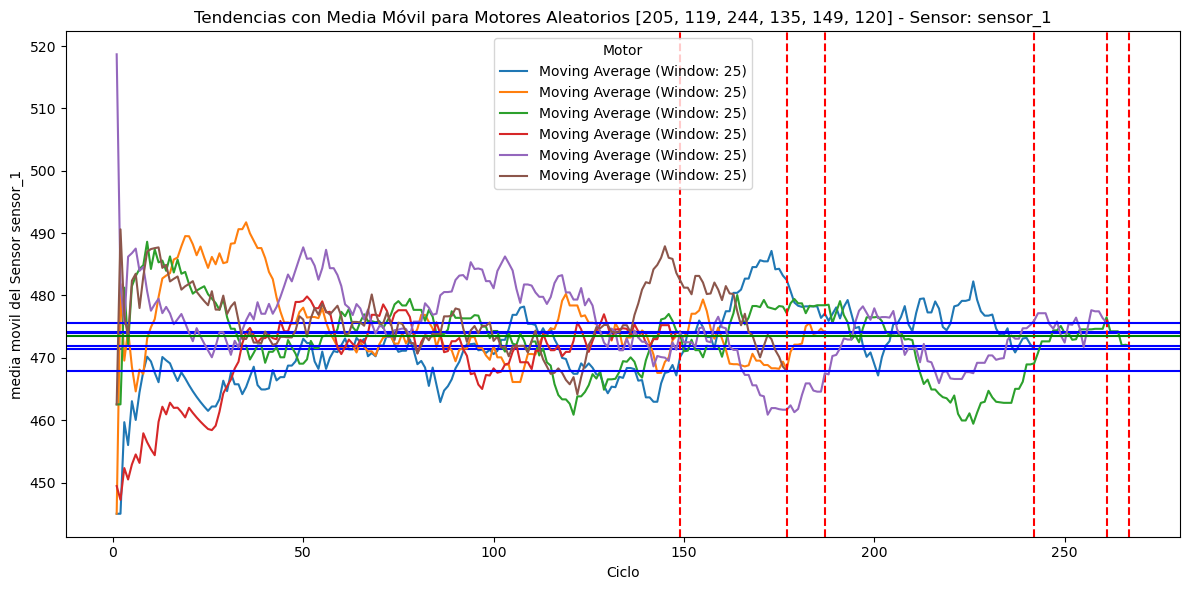

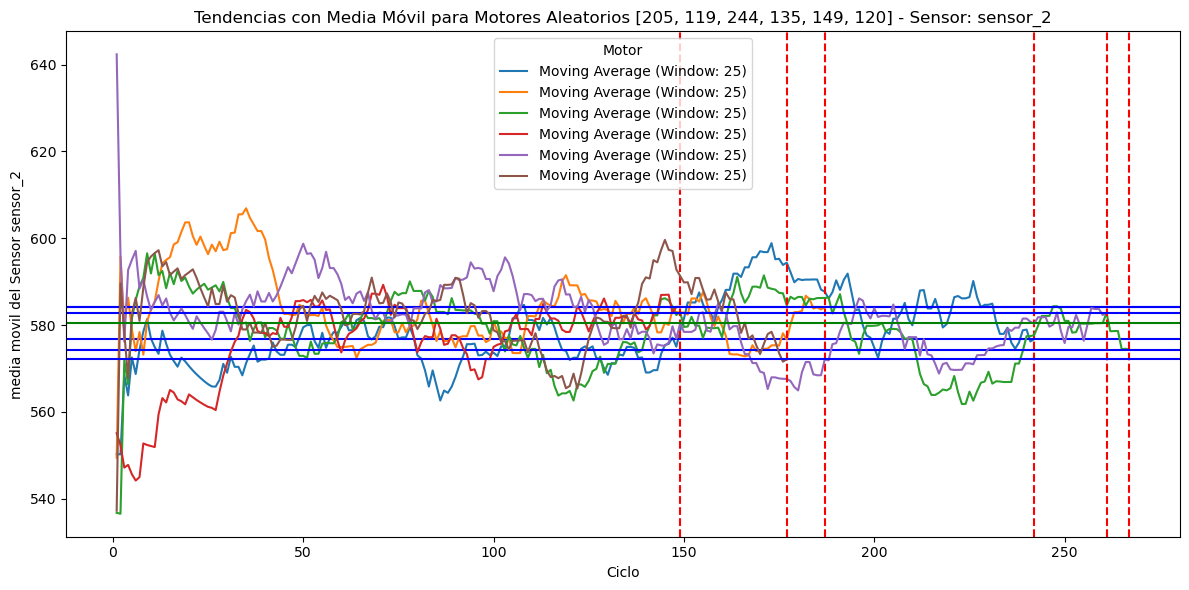

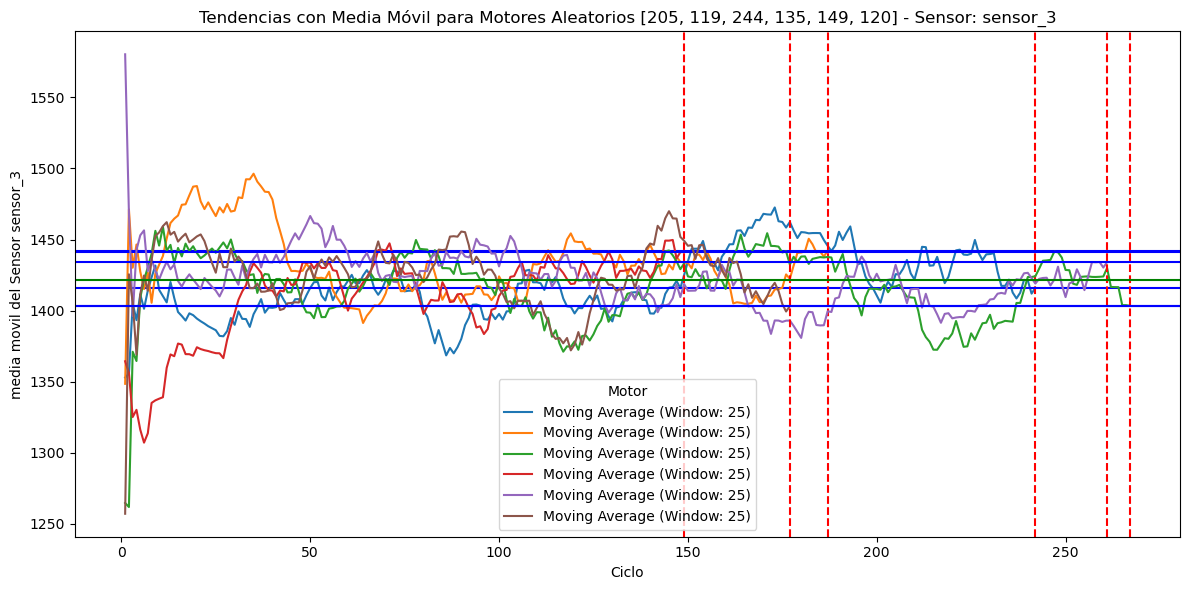

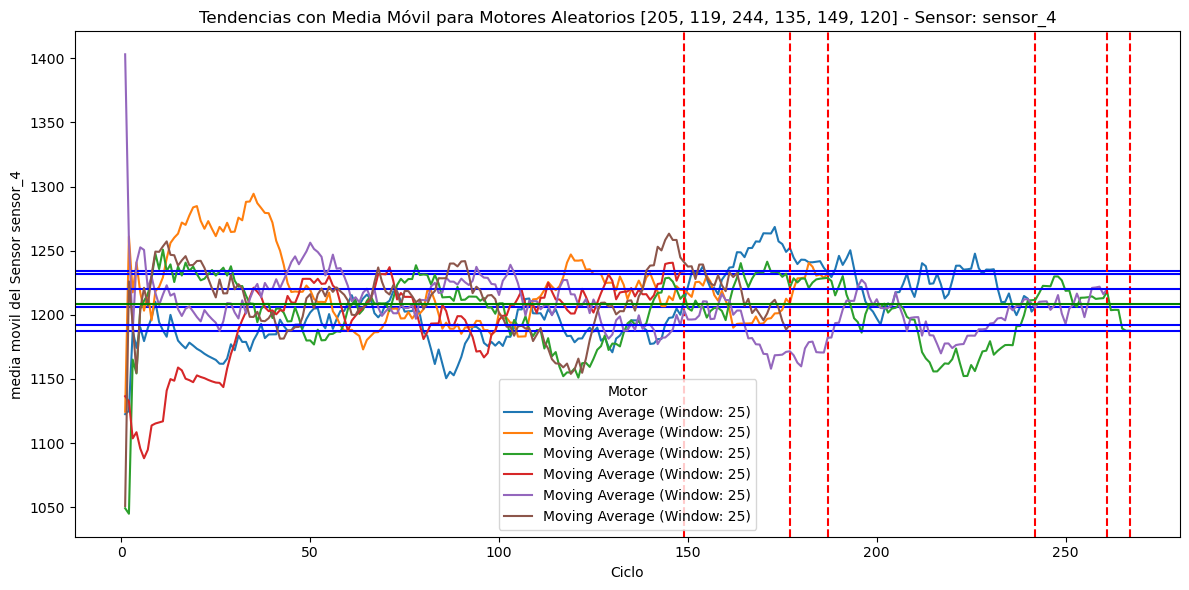

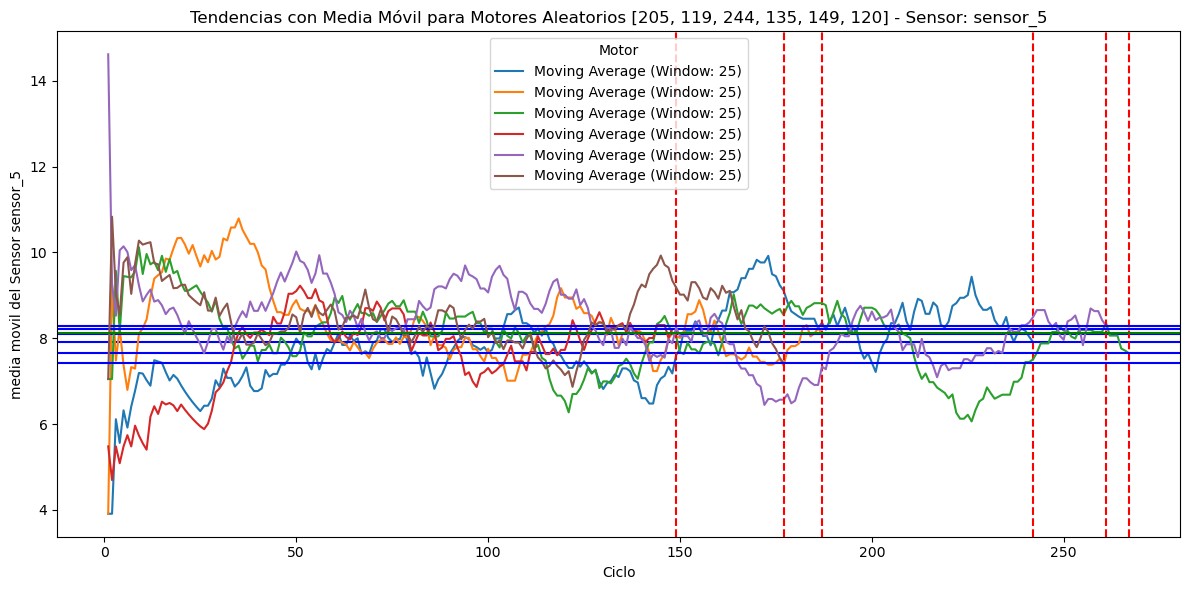

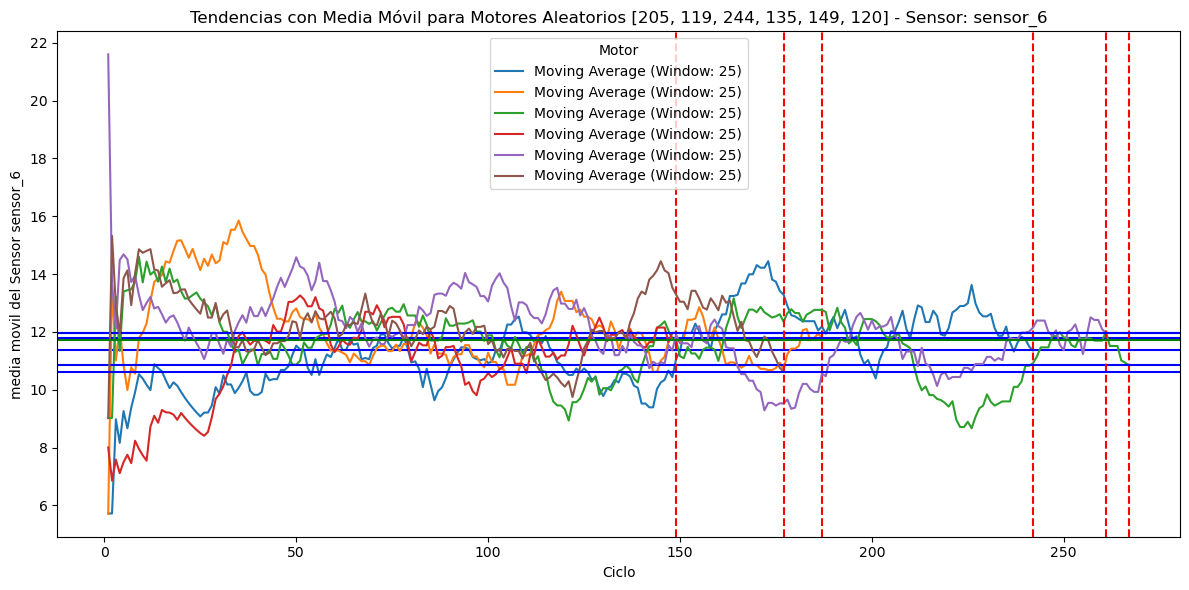

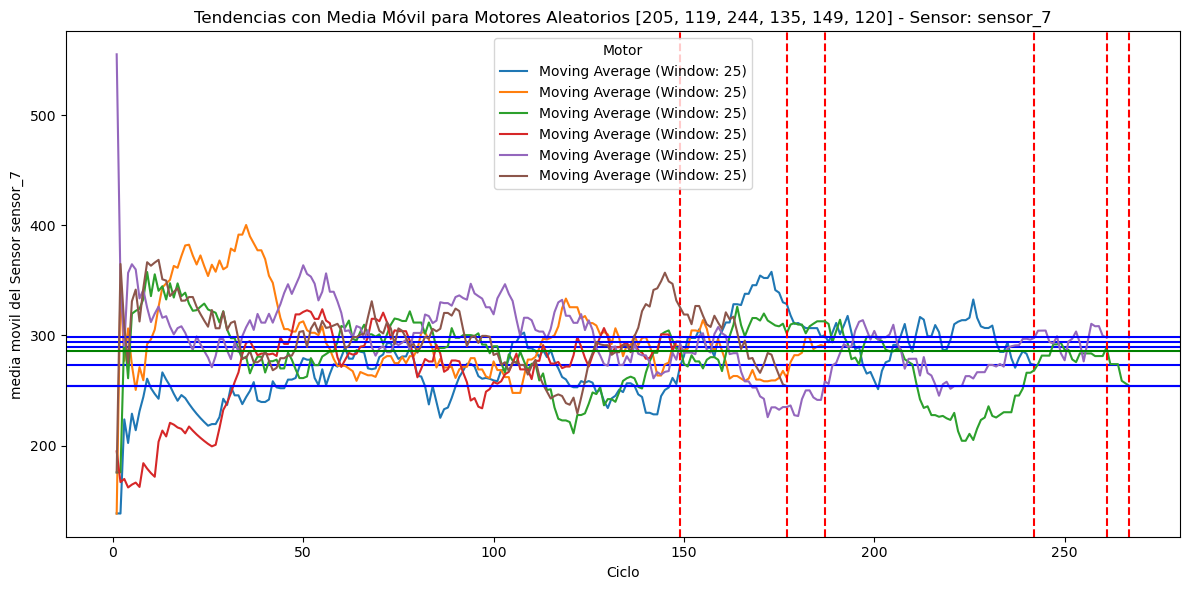

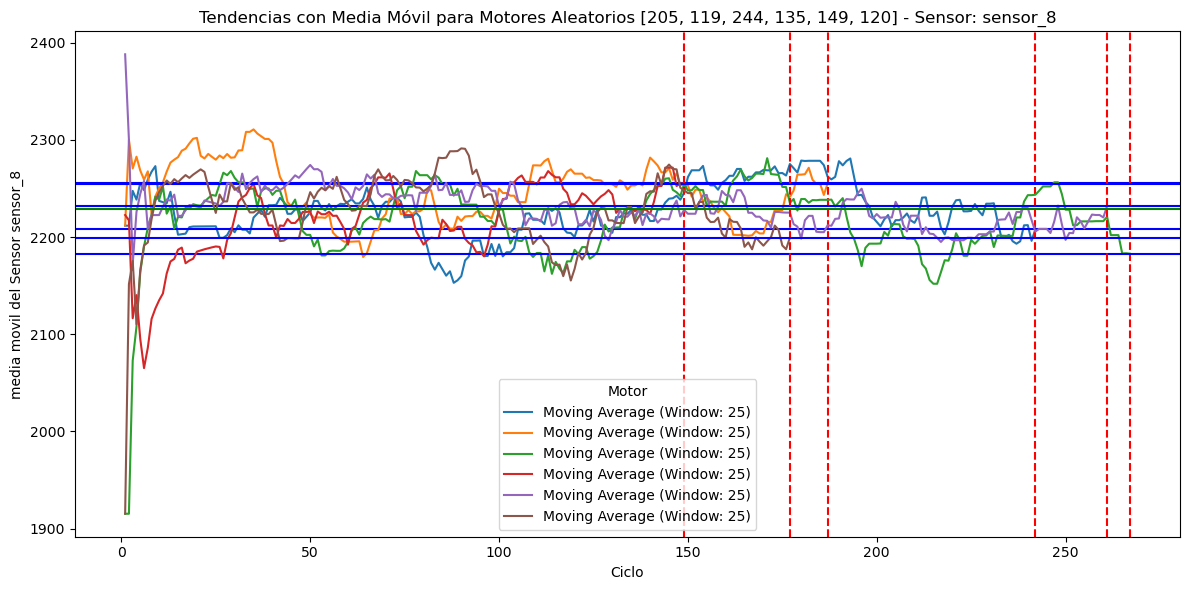

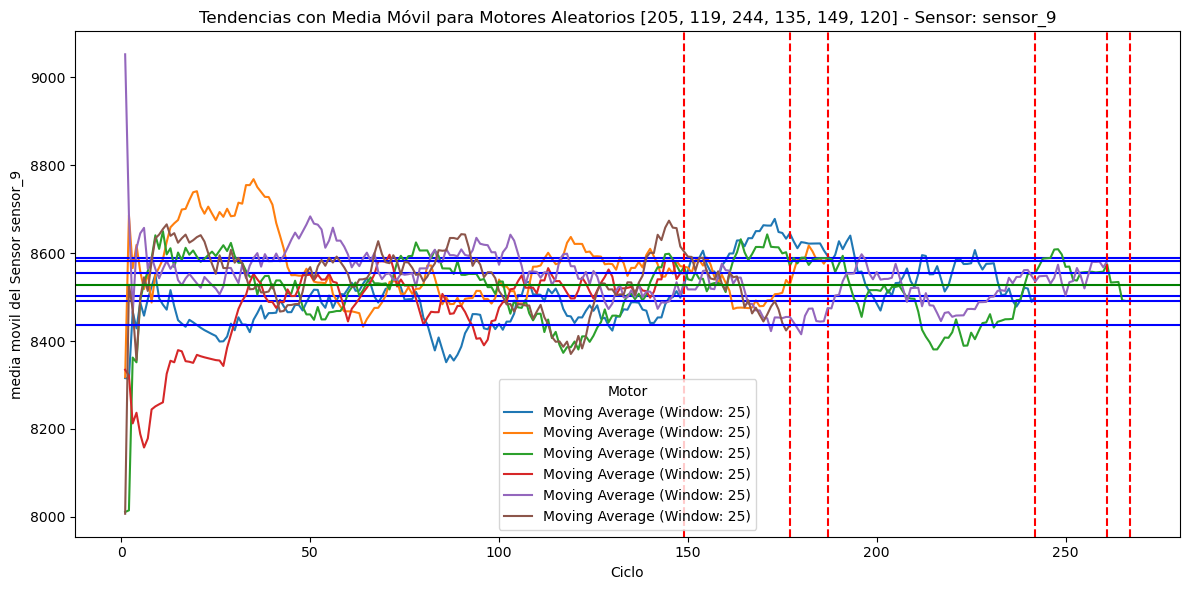

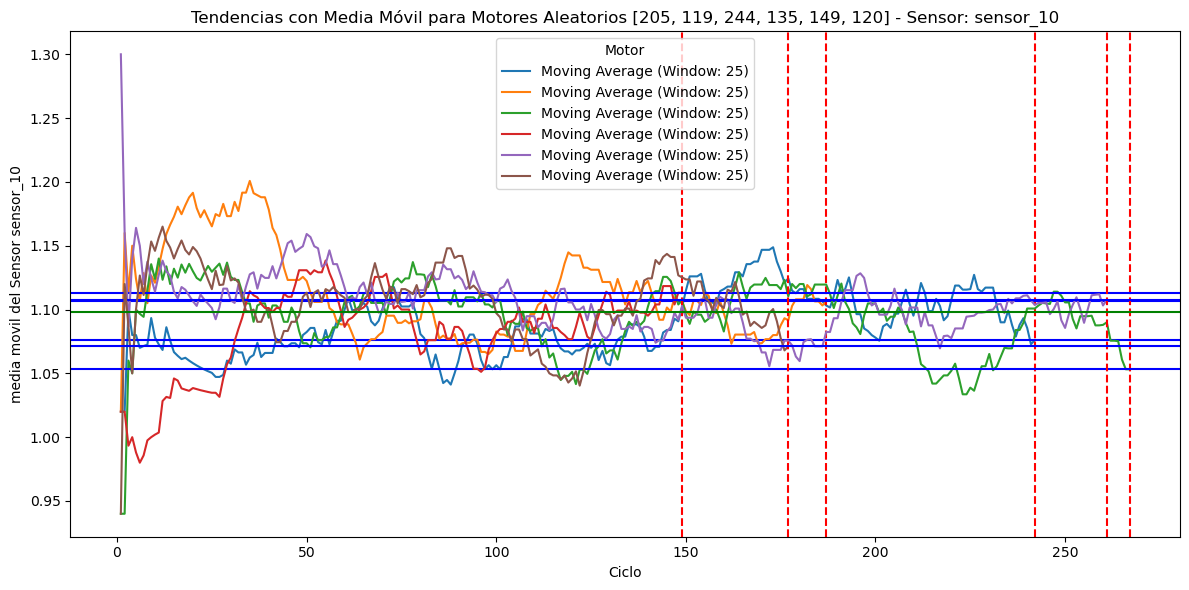

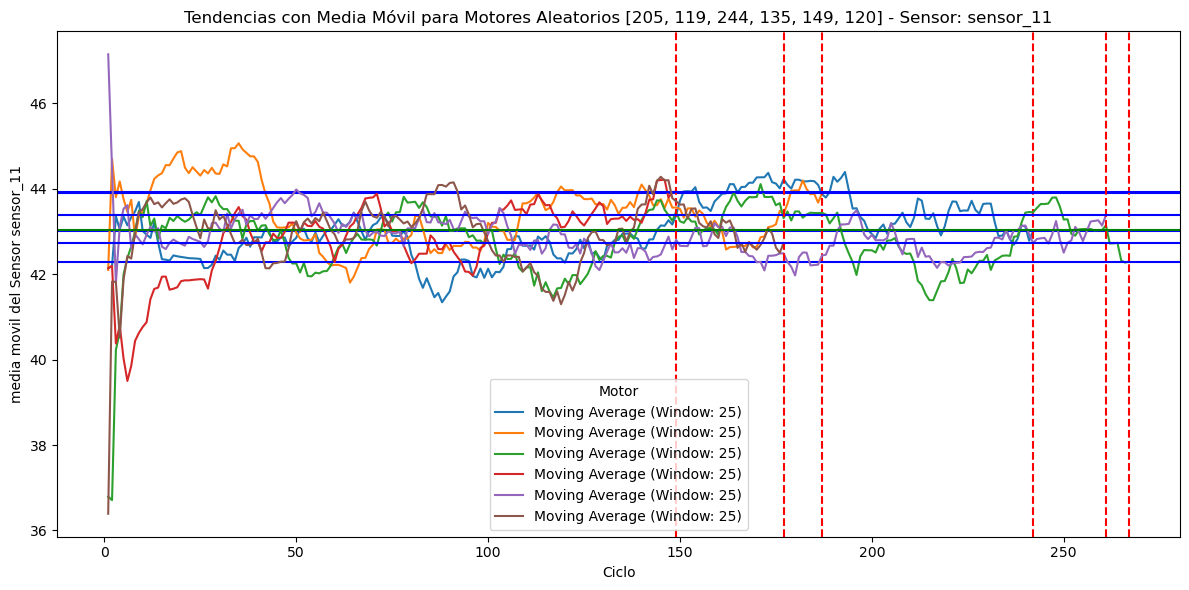

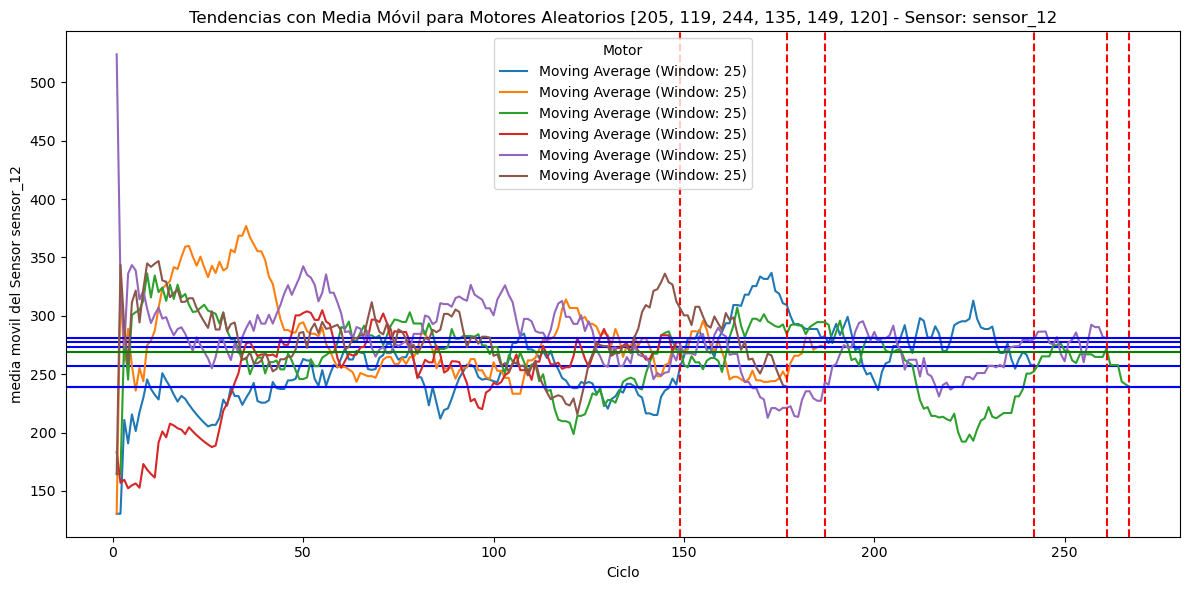

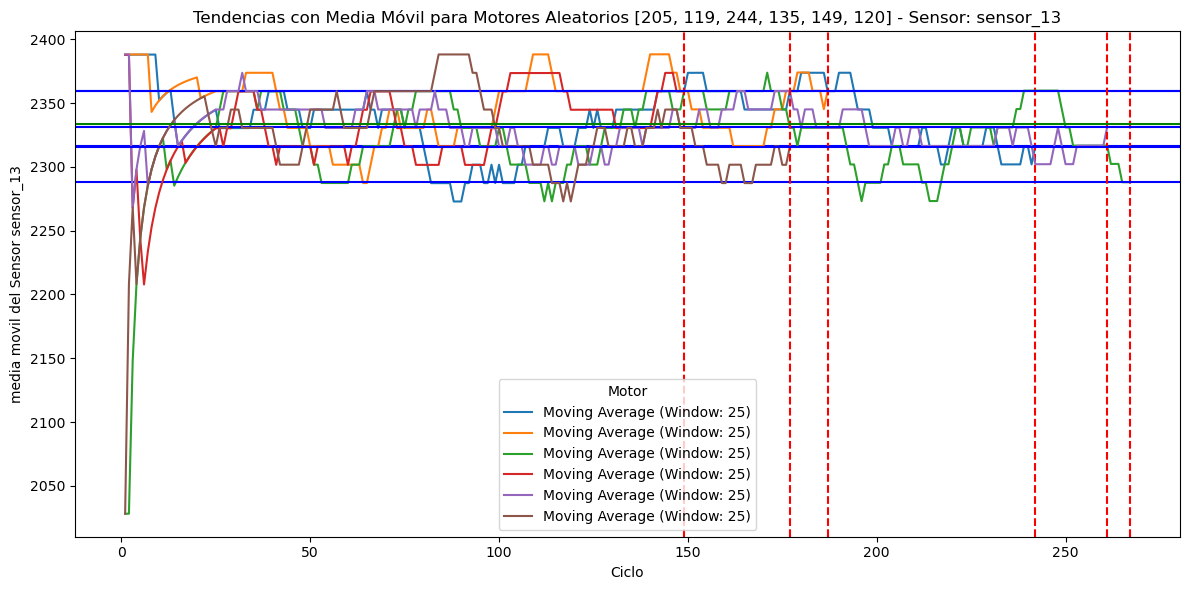

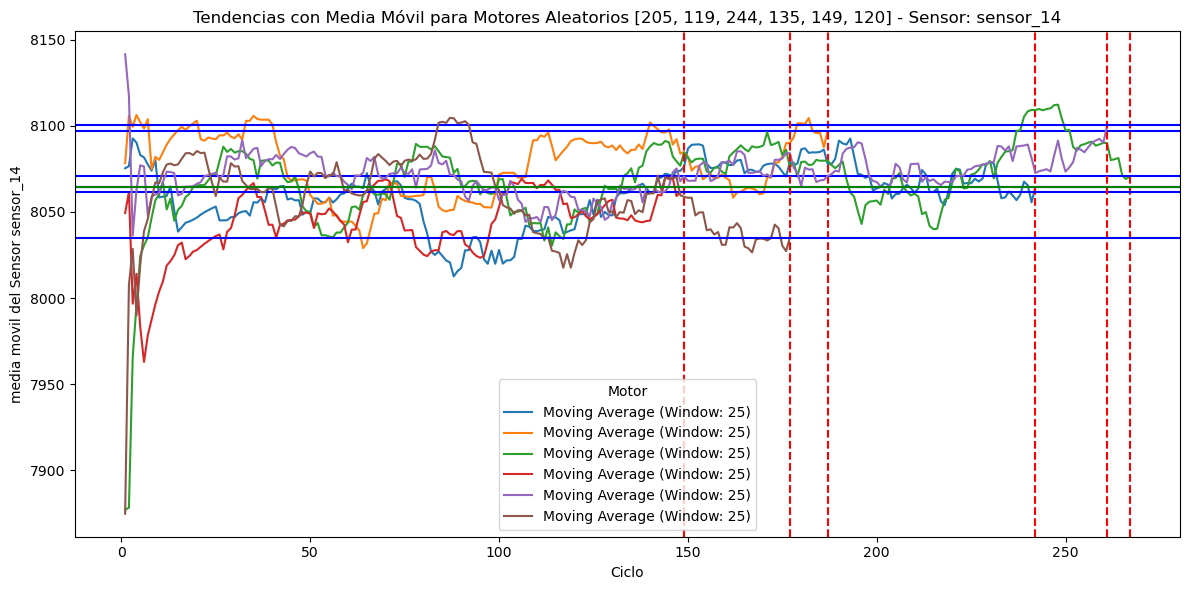

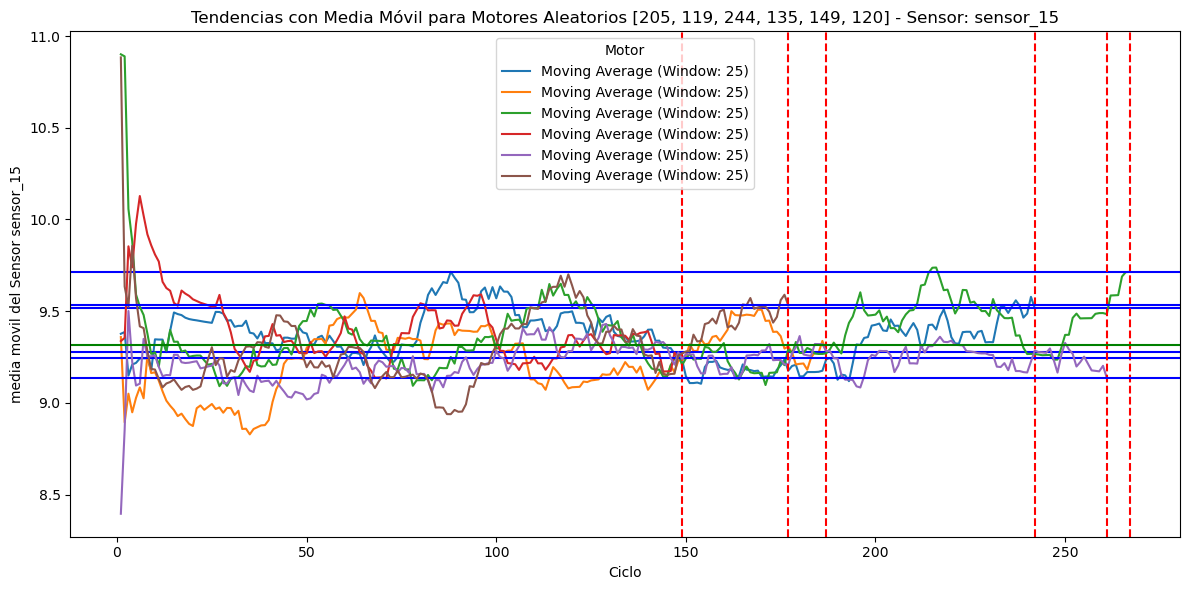

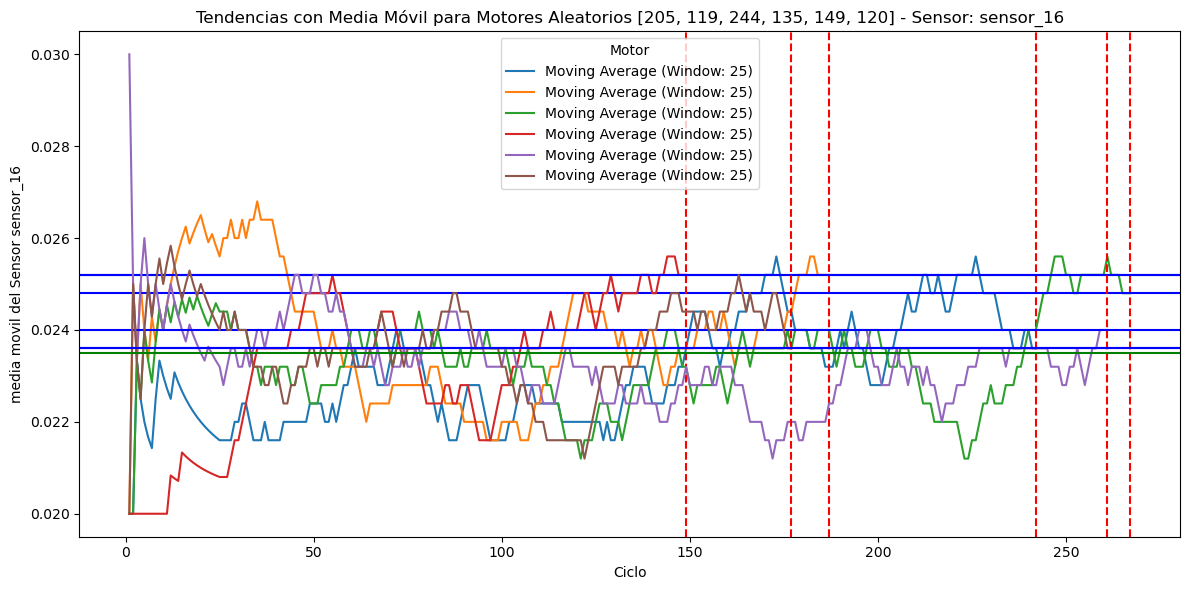

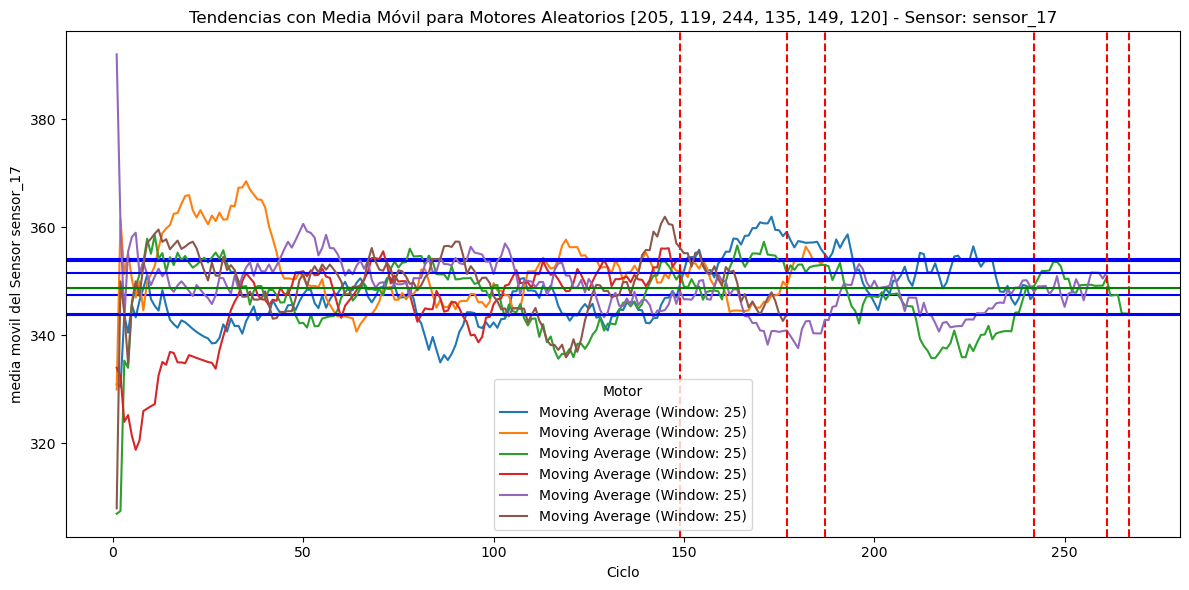

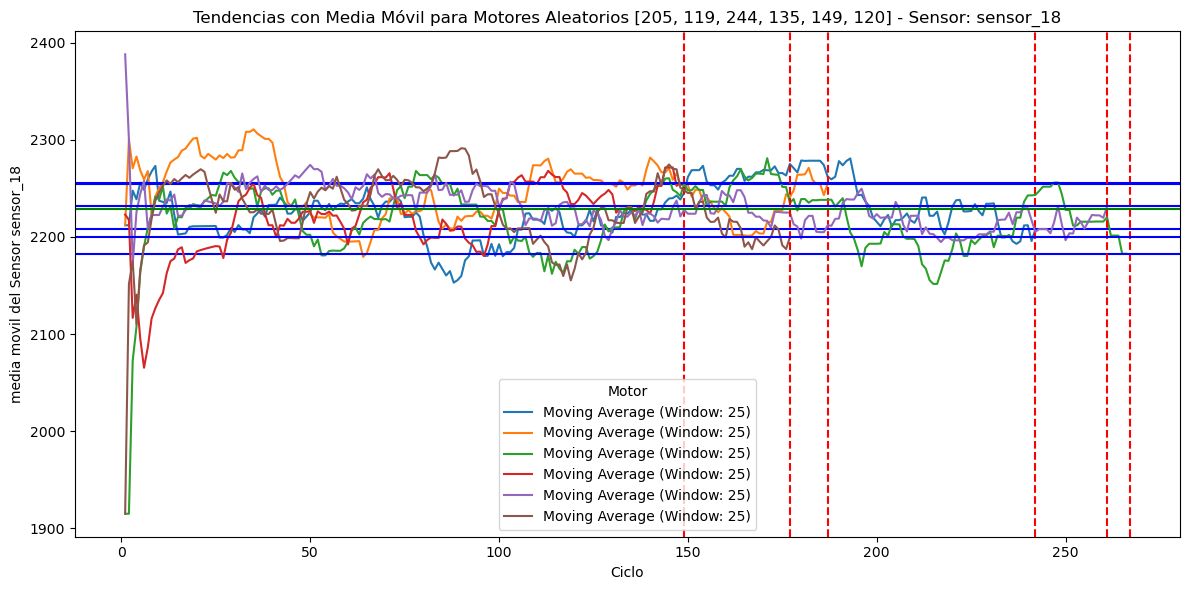

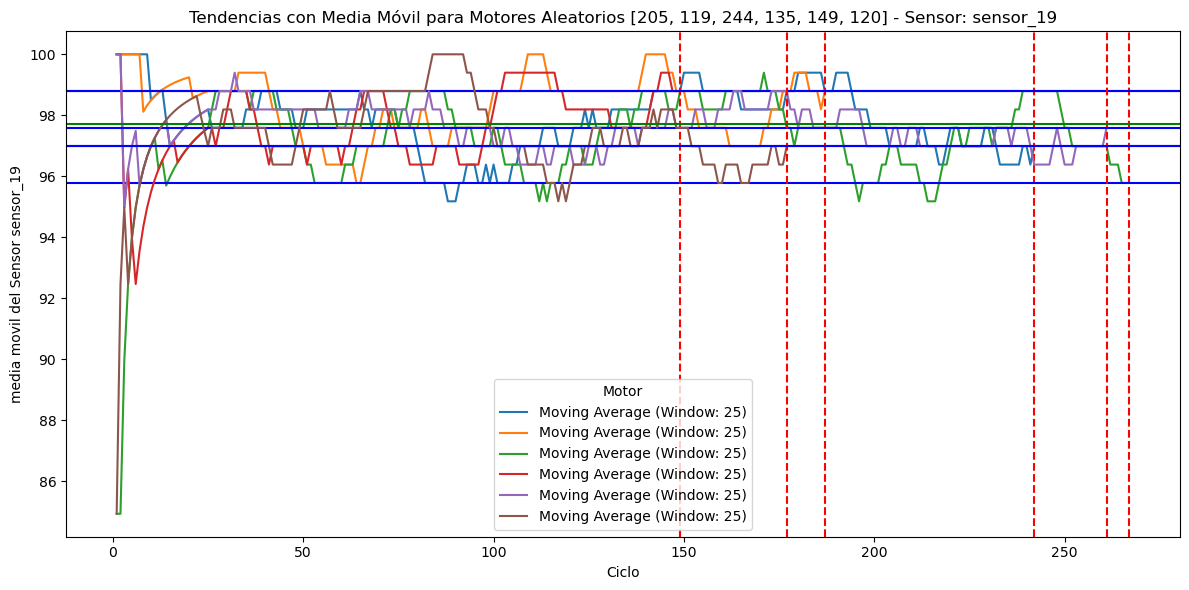

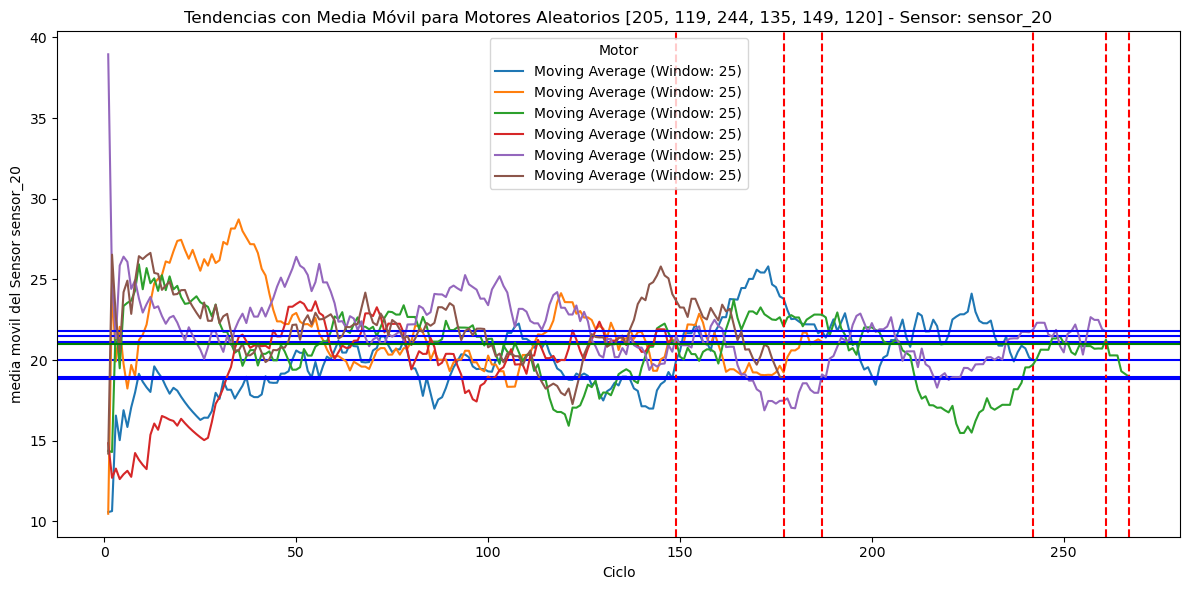

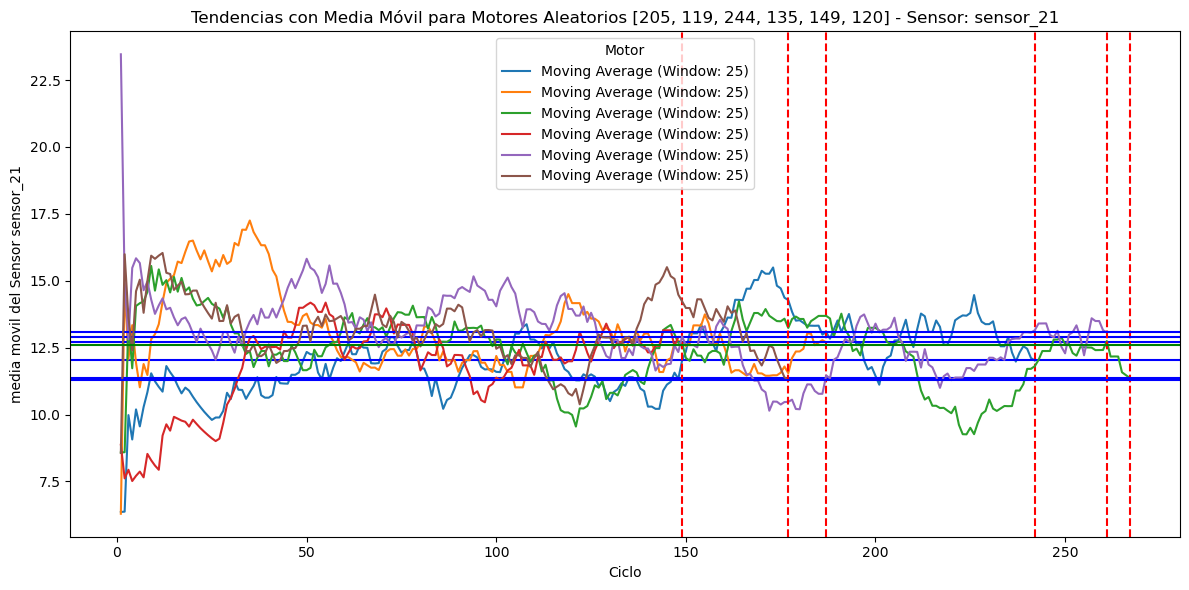

In [27]:
columns = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']

for column in columns:
    plot_sensor_trends_with_moving_average_random_motors(df4, column,num_motors = 6)

In [28]:
profile = ProfileReport(df4,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Carl Kirstein",
                                 "copyright_holder": "Carl Kirstein",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile.to_file("predictive_maintenance_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/27 [00:00<?, ?it/s]
100%|██████████| 27/27 [00:00<00:00, 98.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df_sensores = df4[['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']]

In [30]:
df_sensores.head()

sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0    445.00    549.68   1343.43   1112.93      3.91      5.70    137.36   
1    491.19    606.07   1477.61   1237.50      9.35     13.61    332.10   
2    445.00    548.95   1343.12   1117.05      3.91      5.69    138.18   
3    445.00    548.70   1341.24   1118.03      3.91      5.70    137.98   
4    462.54    536.10   1255.23   1033.59      7.05      9.00    174.82   

   sensor_8  sensor_9  sensor_10  ...  sensor_12  sensor_13  sensor_14  \
0   2211.86   8311.32       1.01  ...     129.78    2387.99    8074.83   
1   2323.66   8713.60       1.07  ...     312.59    2387.73    8046.13   
2   2211.92   8306.69       1.01  ...     129.62    2387.97    8066.62   
3   2211.88   8312.35       1.02  ...     129.80    2388.02    8076.05   
4   1915.22   7994.94       0.93  ...     164.11    2028.08    7865.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     9.3335       0.02        330       2212     100.00      10.62     6.3670  
1     9.1913       0.02        361       2324     100.00      24.37    14.6552  
2     9.4007       0.02        329       2212     100.00      10.48     6.4213  
3     9.3369       0.02        328       2212     100.00      10.54     6.4176  
4    10.8366       0.02        305       1915      84.93      14.03     8.6754  

[5 rows x 21 columns]

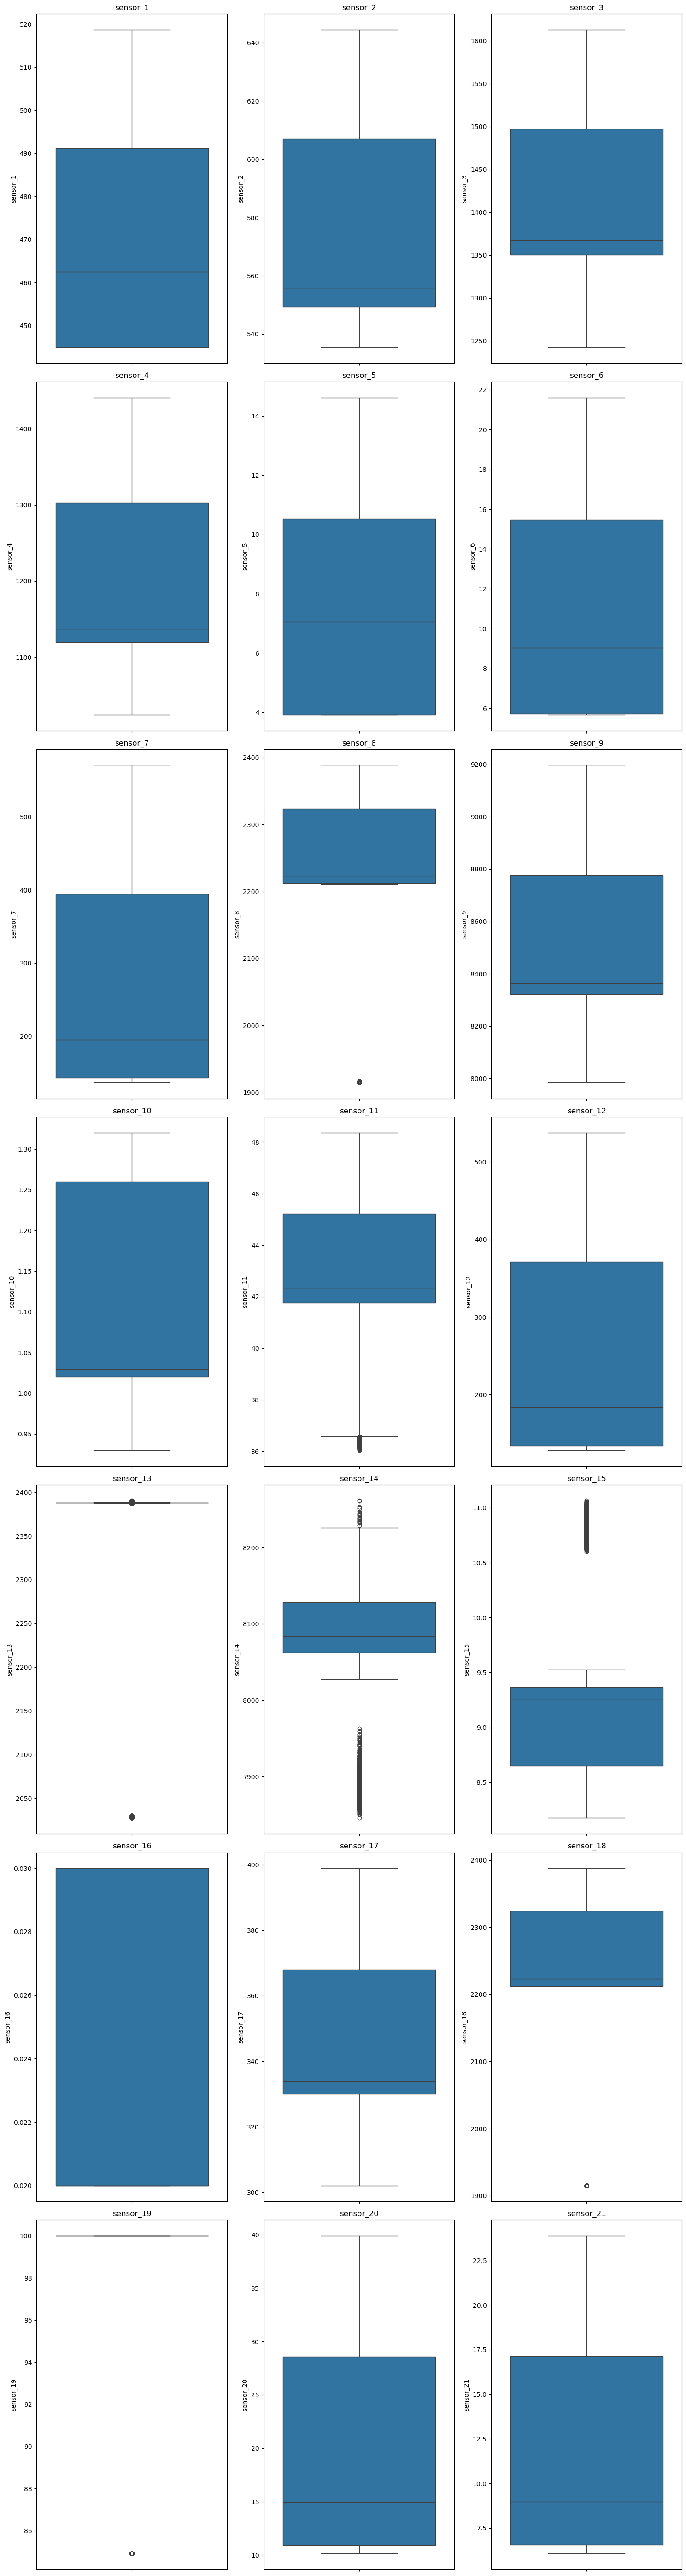

In [31]:
# Calcula el número total de sensores (columnas) en el DataFrame
num_sensores = len(df_sensores.columns)

rows = num_sensores // 3 + (1 if num_sensores % 3 != 0 else 0)
cols = min(3, num_sensores)  # Asegúrate de que no haya más de 3 columnas

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 8 * rows))

for i, col in enumerate(df_sensores.columns):
    row = i // cols
    col_index = i % cols
    
    ax = axes[row, col_index] if cols > 1 else axes[row]
    
    sns.boxplot(data=df_sensores[col], ax=ax)
    ax.set_title(f'{col}')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    individual_fig = plt.figure(figsize=(4, 6))
    sns.boxplot(data=df_sensores[col])
    plt.title(f'{col}')
    individual_fig.savefig(f'IMGS/boxplot_{col}.png')
    plt.close(individual_fig)


plt.tight_layout()

plt.show()

In [32]:
df4.head()

unit  cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0     1      1       42.0049        0.8400         100.0    445.00    549.68   
1     1      2       20.0020        0.7002         100.0    491.19    606.07   
2     1      3       42.0038        0.8409         100.0    445.00    548.95   
3     1      4       42.0000        0.8400         100.0    445.00    548.70   
4     1      5       25.0063        0.6207          60.0    462.54    536.10   

   sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  sensor_15  \
0   1343.43   1112.93      3.91  ...    2387.99    8074.83     9.3335   
1   1477.61   1237.50      9.35  ...    2387.73    8046.13     9.1913   
2   1343.12   1117.05      3.91  ...    2387.97    8066.62     9.4007   
3   1341.24   1118.03      3.91  ...    2388.02    8076.05     9.3369   
4   1255.23   1033.59      7.05  ...    2028.08    7865.80    10.8366   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  
0       0.02        330       2212     100.00      10.62     6.3670  320  
1       0.02        361       2324     100.00      24.37    14.6552  319  
2       0.02        329       2212     100.00      10.48     6.4213  318  
3       0.02        328       2212     100.00      10.54     6.4176  317  
4       0.02        305       1915      84.93      14.03     8.6754  316  

[5 rows x 27 columns]

In [33]:
df_varianzas = df4.drop(['unit', 'cycle','RUL'], axis = 1)
df_varianzas

op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  sensor_3  \
0           42.0049        0.8400         100.0    445.00    549.68   1343.43   
1           20.0020        0.7002         100.0    491.19    606.07   1477.61   
2           42.0038        0.8409         100.0    445.00    548.95   1343.12   
3           42.0000        0.8400         100.0    445.00    548.70   1341.24   
4           25.0063        0.6207          60.0    462.54    536.10   1255.23   
...             ...           ...           ...       ...       ...       ...   
61244        9.9998        0.2500         100.0    489.05    605.33   1516.36   
61245        0.0028        0.0015         100.0    518.67    643.42   1598.92   
61246        0.0029        0.0000         100.0    518.67    643.68   1607.72   
61247       35.0046        0.8400         100.0    449.44    555.77   1381.29   
61248       42.0030        0.8400         100.0    445.00    549.85   1369.75   

       sensor_4  sensor_5  sensor_6  sensor_7  ...  sensor_12  sensor_13  \
0       1112.93      3.91      5.70    137.36  ...     129.78    2387.99   
1       1237.50      9.35     13.61    332.10  ...     312.59    2387.73   
2       1117.05      3.91      5.69    138.18  ...     129.62    2387.97   
3       1118.03      3.91      5.70    137.98  ...     129.80    2388.02   
4       1033.59      7.05      9.00    174.82  ...     164.11    2028.08   
...         ...       ...       ...       ...  ...        ...        ...   
61244   1315.28     10.52     15.46    404.59  ...     380.16    2388.73   
61245   1426.77     14.62     21.57    567.59  ...     535.02    2388.46   
61246   1430.56     14.62     21.57    569.04  ...     535.41    2388.48   
61247   1148.18      5.48      7.96    199.93  ...     187.92    2388.83   
61248   1147.45      3.91      5.69    142.47  ...     134.32    2388.66   

       sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0        8074.83     9.3335       0.02        330       2212     100.00   
1        8046.13     9.1913       0.02        361       2324     100.00   
2        8066.62     9.4007       0.02        329       2212     100.00   
3        8076.05     9.3369       0.02        328       2212     100.00   
4        7865.80    10.8366       0.02        305       1915      84.93   
...          ...        ...        ...        ...        ...        ...   
61244    8185.69     8.4541       0.03        372       2319     100.00   
61245    8185.47     8.2221       0.03        396       2388     100.00   
61246    8193.94     8.2525       0.03        395       2388     100.00   
61247    8125.64     9.0515       0.02        337       2223     100.00   
61248    8144.33     9.1207       0.02        333       2212     100.00   

       sensor_20  sensor_21  
0          10.62     6.3670  
1          24.37    14.6552  
2          10.48     6.4213  
3          10.54     6.4176  
4          14.03     8.6754  
...          ...        ...  
61244      29.11    17.5234  
61245      39.38    23.7151  
61246      39.78    23.8270  
61247      15.26     9.0774  
61248      10.66     6.4341  

[61249 rows x 24 columns]

In [34]:
varianzas = df_varianzas.var(numeric_only=True, ddof = 0)
varianzas.sort_values()

sensor_16            0.000022
sensor_10            0.016302
op_setting_2         0.096535
sensor_15            0.563051
sensor_11           10.520066
sensor_5            13.124988
sensor_19           28.830240
sensor_6            29.636832
sensor_21           35.553178
sensor_20           98.730356
op_setting_3       203.114874
op_setting_1       218.466166
sensor_1           698.894656
sensor_17          773.288003
sensor_2          1394.450495
sensor_14         7339.322185
sensor_3         11271.374781
sensor_4         14238.841421
sensor_13        16434.422790
sensor_12        19176.150584
sensor_8         21125.766789
sensor_18        21161.900182
sensor_7         21573.443719
sensor_9        113518.318199
dtype: float64

           index       Varianza  Proporcion_Varianza  Varianza_Acumulada  \
11      sensor_9  113518.318199         4.552664e-01            0.455266   
9       sensor_7   21573.443719         8.652052e-02            0.541787   
20     sensor_18   21161.900182         8.487002e-02            0.626657   
10      sensor_8   21125.766789         8.472511e-02            0.711382   
14     sensor_12   19176.150584         7.690615e-02            0.788288   
15     sensor_13   16434.422790         6.591042e-02            0.854199   
6       sensor_4   14238.841421         5.710502e-02            0.911304   
5       sensor_3   11271.374781         4.520396e-02            0.956508   
16     sensor_14    7339.322185         2.943443e-02            0.985942   
4       sensor_2    1394.450495         5.592458e-03            0.991534   
19     sensor_17     773.288003         3.101280e-03            0.994636   
3       sensor_1     698.894656         2.802924e-03            0.997439   
0   op_setti

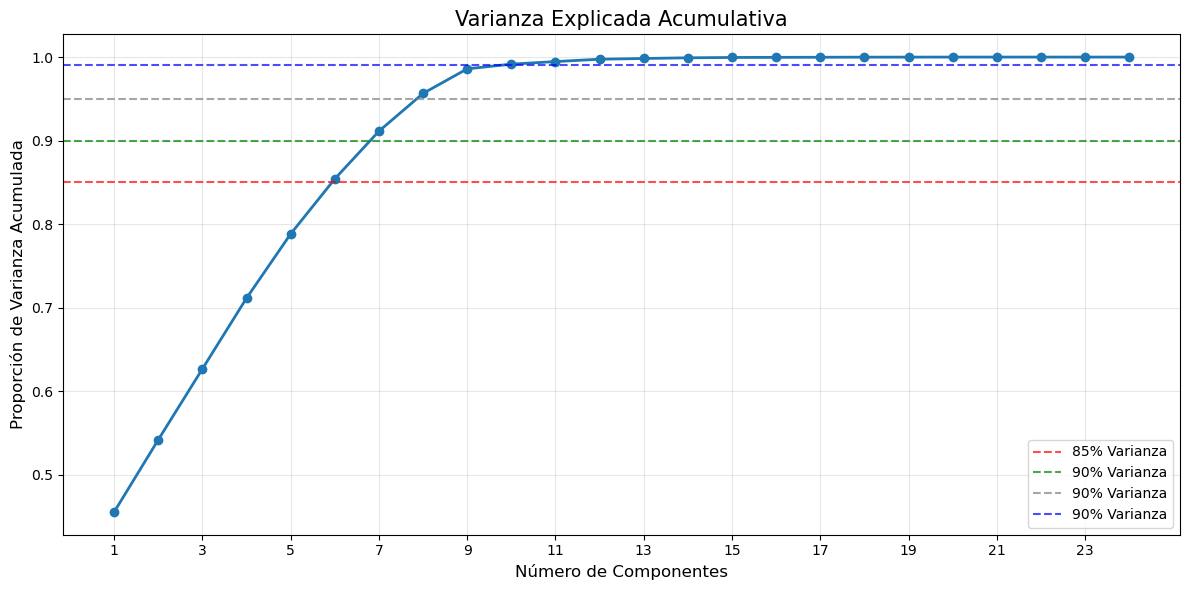

Se necesitan 6 componentes para explicar al menos el 85% de la varianza.
Se necesitan 7 componentes para explicar al menos el 90% de la varianza.
Se necesitan 8 componentes para explicar al menos el 95% de la varianza.
Se necesitan 10 componentes para explicar al menos el 99% de la varianza.

Variables que forman los primeros componentes (ordenadas por varianza):
        index  Proporcion_Varianza  Varianza_Acumulada
11   sensor_9             0.455266            0.455266
9    sensor_7             0.086521            0.541787
20  sensor_18             0.084870            0.626657
10   sensor_8             0.084725            0.711382
14  sensor_12             0.076906            0.788288
15  sensor_13             0.065910            0.854199
6    sensor_4             0.057105            0.911304
5    sensor_3             0.045204            0.956508
16  sensor_14             0.029434            0.985942
4    sensor_2             0.005592            0.991534


In [35]:
df_varianzas = varianzas.to_frame(name = 'Varianza').reset_index()

varianza_total = sum(df_varianzas.Varianza)

df_varianzas['Proporcion_Varianza'] = df_varianzas['Varianza'] / varianza_total

df_varianzas = df_varianzas.sort_values(by='Proporcion_Varianza', ascending=False)

df_varianzas['Varianza_Acumulada'] = df_varianzas['Proporcion_Varianza'].cumsum()

df_varianzas['Componente'] = range(1, len(df_varianzas) + 1)



print(df_varianzas)

plt.figure(figsize=(12, 6))


plt.plot(df_varianzas['Componente'], df_varianzas['Varianza_Acumulada'], 
         'o-', linewidth=2, markersize=6)


plt.axhline(y=0.85, color='r', linestyle='--', alpha=0.7, label='85% Varianza')
plt.axhline(y=0.90, color='g', linestyle='--', alpha=0.7, label='90% Varianza')
plt.axhline(y=0.95, color='grey', linestyle='--', alpha=0.7, label='90% Varianza')
plt.axhline(y=0.99, color='b', linestyle='--', alpha=0.7, label='90% Varianza')


plt.title('Varianza Explicada Acumulativa', fontsize=15)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Proporción de Varianza Acumulada', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()


plt.xticks(range(1, len(df_varianzas) + 1, 2))
plt.tight_layout()
plt.savefig(f'IMGS/acumulacion de varianzas.png')
plt.show()

componentes_85 = df_varianzas[df_varianzas['Varianza_Acumulada'] >= 0.85].iloc[0]['Componente']
componentes_90 = df_varianzas[df_varianzas['Varianza_Acumulada'] >= 0.90].iloc[0]['Componente']
componentes_95 = df_varianzas[df_varianzas['Varianza_Acumulada'] >= 0.95].iloc[0]['Componente']
componentes_99 = df_varianzas[df_varianzas['Varianza_Acumulada'] >= 0.99].iloc[0]['Componente']

print(f"Se necesitan {int(componentes_85)} componentes para explicar al menos el 85% de la varianza.")
print(f"Se necesitan {int(componentes_90)} componentes para explicar al menos el 90% de la varianza.")
print(f"Se necesitan {int(componentes_95)} componentes para explicar al menos el 95% de la varianza.")
print(f"Se necesitan {int(componentes_99)} componentes para explicar al menos el 99% de la varianza.")

print("\nVariables que forman los primeros componentes (ordenadas por varianza):")
print(df_varianzas.iloc[:int(componentes_99)][['index', 'Proporcion_Varianza', 'Varianza_Acumulada']])